In [43]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
data_path = "../data/imagenet_r50"
model_exts = ["adv_train", "train"]
data_files = ['class_dims_test', 'classwise_acc_e0.0', 'classwise_acc_e2.0', 'classwise_acc_e3.-']

def load_data(model_ext, data_ext):
    with open(f"{data_path}_{model_ext}/{data_ext}.pkl", "rb") as f:
        return pickle.load(f)
    
std_class_acc_e0 = load_data("train", "classwise_acc_e0.0")
adv_class_acc_e0 = load_data("adv_train", "classwise_acc_e0.0")
std_class_acc_e2 = load_data("train", "classwise_acc_e2.0")
adv_class_acc_e2 = load_data("adv_train", "classwise_acc_e2.0")
std_class_acc_e3 = load_data("train", "classwise_acc_e3.0")
adv_class_acc_e3 = load_data("adv_train", "classwise_acc_e3.0")

std_class_dims = load_data("train", "class_dims_test")
adv_class_dims = load_data("adv_train", "class_dims_test")


In [57]:
std_r50 = pd.DataFrame(index=np.arange(1000), columns=["class_dims", "e0_acc", "e2_acc", "e3_acc"])
adv_r50 = pd.DataFrame(index=np.arange(1000), columns=["class_dims", "e0_acc", "e2_acc", "e3_acc"])

std_r50["class_dims"] = std_class_dims
std_r50["e0_acc"] = std_class_acc_e0
std_r50["e2_acc"] = std_class_acc_e2
std_r50["e3_acc"] = std_class_acc_e3

adv_r50["class_dims"] = adv_class_dims
adv_r50["e0_acc"] = adv_class_acc_e0
adv_r50["e2_acc"] = adv_class_acc_e2
adv_r50["e3_acc"] = adv_class_acc_e3

adv_r50.tail()


,class_dims,e0_acc,e2_acc,e3_acc
995,11.281894,1.00,1.00,0.96
996,10.146167,0.78,0.64,0.50
997,12.126175,0.62,0.48,0.36
998,10.514164,0.48,0.30,0.24
999,9.747229,0.18,0.16,0.14


In [86]:
grouped_df = pd.DataFrame(index=np.arange(2000), columns=["model", "class_dims", "e0_acc", "e2_acc", "e3_acc"])
grouped_df["model"] = ["std"]*1000 + ["adv"]*1000

grouped_df.loc[:999, "class_dims"] = list(std_r50["class_dims"])
grouped_df.loc[:999, "e0_acc"] = list(std_r50["e0_acc"])
grouped_df.loc[:999, "e2_acc"] = list(std_r50["e2_acc"])
grouped_df.loc[:999, "e3_acc"] = list(std_r50["e3_acc"])

grouped_df.loc[1000:, "class_dims"] = list(adv_r50["class_dims"])
grouped_df.loc[1000:, "e0_acc"] = list(adv_r50["e0_acc"])
grouped_df.loc[1000:, "e2_acc"] = list(adv_r50["e2_acc"])
grouped_df.loc[1000:, "e3_acc"] = list(adv_r50["e3_acc"])


In [106]:
plot1_df = grouped_df.melt(id_vars=['model', 'class_dims'], value_vars=['e0_acc', 'e2_acc', 'e3_acc'], 
                    var_name='epsilon', value_name='accuracy')
plot1_df["epsilon"] = plot1_df["epsilon"].apply(lambda x: x.split("_")[0])
plot1_df["epsilon"] = plot1_df["epsilon"].apply(lambda x: x[1:])
plot1_df
plot1_df['model'] = plot1_df['model'].apply(lambda x: "Standard Training" if x == "std" else "Adversarially Trained")

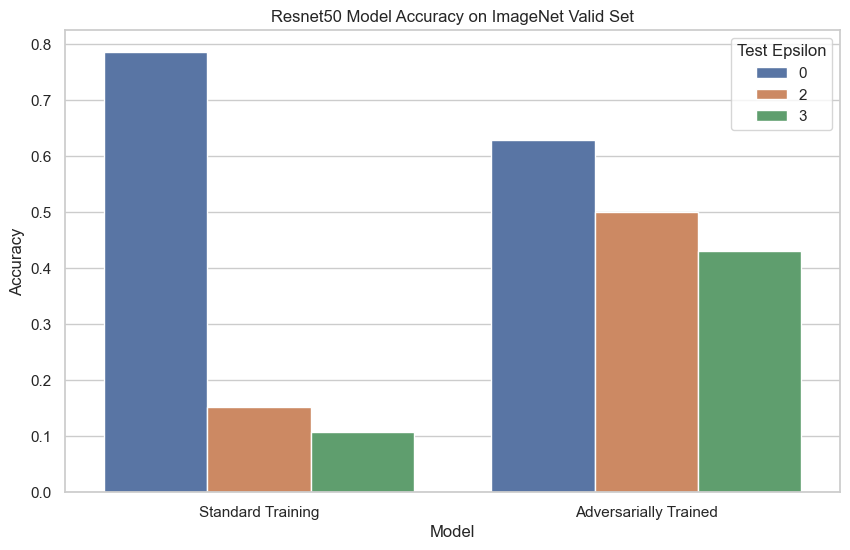

In [176]:
# grouped bar plot for accuracies

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='accuracy', hue='epsilon', data=plot1_df, errorbar=None)
plt.title('Resnet50 Model Accuracy on ImageNet Valid Set')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend(title='Test Epsilon')
plt.show()

Pearsons correlation: 0.064


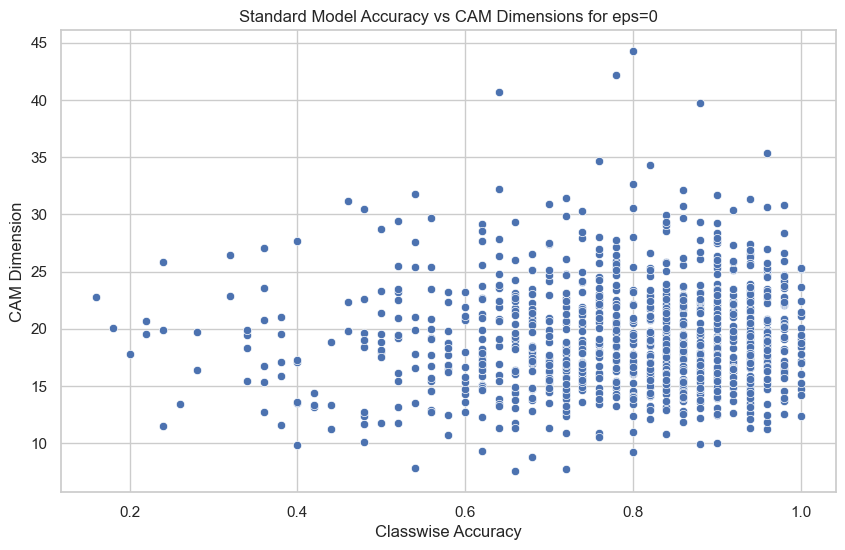

In [175]:
# plot 2 - class dims vs accuracy for standard model

plt.figure(figsize=(10, 6))
sns.scatterplot(x='e0_acc', y='class_dims', data=std_r50)
plt.title('Standard Model Accuracy vs CAM Dimensions for eps=0')
plt.xlabel('Classwise Accuracy')
plt.ylabel('CAM Dimension')
# pearson correlation between the vars
from scipy.stats import pearsonr
corr, _ = pearsonr(std_r50["e0_acc"], std_r50["class_dims"])
print('Pearsons correlation: %.3f' % corr)
plt.show()

Pearsons correlation: -0.011


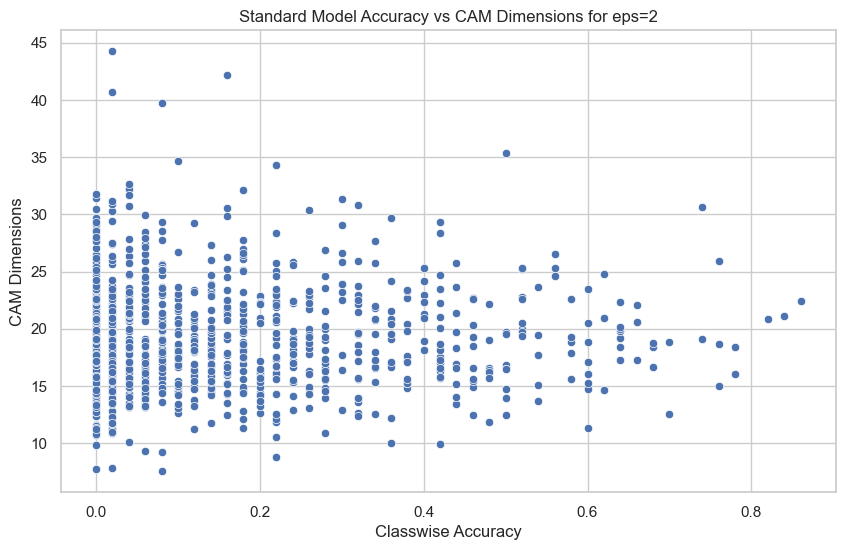

In [124]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='e2_acc', y='class_dims', data=std_r50)
plt.title('Standard Model Accuracy vs CAM Dimensions for eps=2')
plt.ylabel('CAM Dimensions')
plt.xlabel('Classwise Accuracy')
# pearson correlation between the vars
from scipy.stats import pearsonr
corr, _ = pearsonr(std_r50["e2_acc"], std_r50["class_dims"])
print('Pearsons correlation: %.3f' % corr)
plt.show()


Pearsons correlation: -0.006


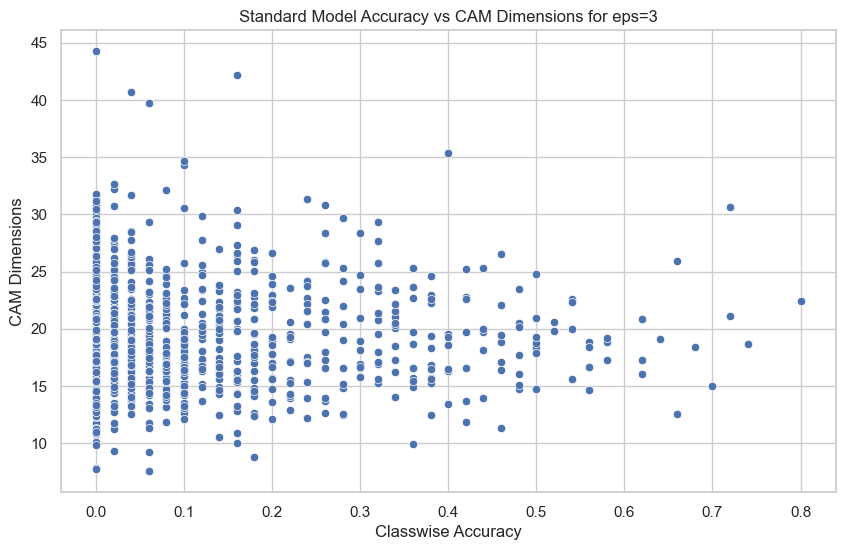

In [125]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='e3_acc', y='class_dims', data=std_r50)
plt.title('Standard Model Accuracy vs CAM Dimensions for eps=3')
plt.ylabel('CAM Dimensions')
plt.xlabel('Classwise Accuracy')
# pearson correlation between the vars
from scipy.stats import pearsonr
corr, _ = pearsonr(std_r50["e3_acc"], std_r50["class_dims"])
print('Pearsons correlation: %.3f' % corr)
plt.show()


Pearsons correlation: -0.011


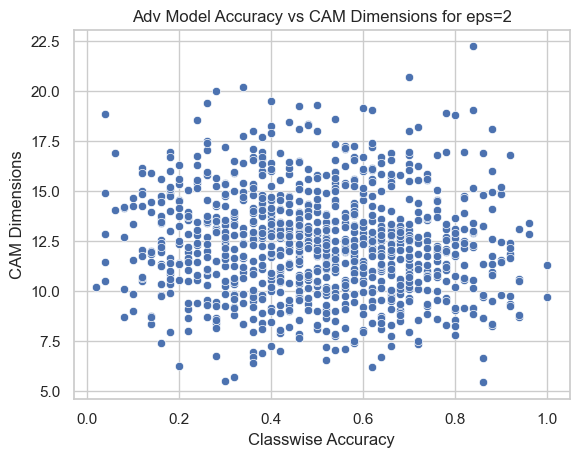

In [177]:
eps = 2
sns.scatterplot(x=f'e{eps}_acc', y='class_dims', data=adv_r50)
plt.title(f'Adv Model Accuracy vs CAM Dimensions for eps={eps}')
plt.ylabel('CAM Dimensions')
plt.xlabel('Classwise Accuracy')
# pearson correlation between the vars
from scipy.stats import pearsonr
corr, _ = pearsonr(std_r50[f"e{eps}_acc"], std_r50["class_dims"])
print('Pearsons correlation: %.3f' % corr)
plt.show()


Pearsons correlation: -0.338


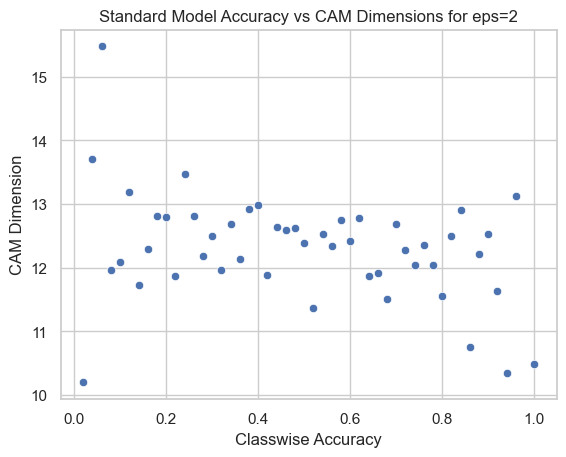

In [165]:
# for every  accuracy, average the class_dims 
eps = 2
new_df = adv_r50.groupby(f"e{eps}_acc").mean().reset_index()

sns.scatterplot(x=f'e{eps}_acc', y='class_dims', data=new_df)
plt.title(f'Standard Model Accuracy vs CAM Dimensions for eps={eps}')
plt.xlabel('Classwise Accuracy')
plt.ylabel('CAM Dimension')
# pearson correlation between the vars
from scipy.stats import pearsonr
corr, _ = pearsonr(new_df[f"e{eps}_acc"], new_df["class_dims"])
print('Pearsons correlation: %.3f' % corr)
